In [1]:
from helper import *
from math import log,pi

inpu_data1 = read_input('LS_Group05/Class1.txt')
inpu_data2 = read_input('LS_Group05/Class2.txt')
inpu_data3 = read_input('LS_Group05/Class3.txt')

train_data1,test_data1 = part_data(inpu_data1)
train_data2,test_data2 = part_data(inpu_data2)
train_data3,test_data3 = part_data(inpu_data3)

mean1,variance1 = get_stats(train_data1)
mean2,variance2 = get_stats(train_data2)
mean3,variance3 = get_stats(train_data3)

print mean1, variance1
print mean2, variance2
print mean3, variance3

[15.864532533333344, 0.07460434986666664] [10.552588976754635, 2.561498012628283]
[6.079232266666659, -11.961134399999997] [3.097570937385626, 4.6540459460967725]
[-1.1253890266666666, 1.6490224960000002] [1.4598883544935792, 9.011994973390506]


In [2]:
# For part a
def cov_task1():
    cov= matrix_add([variance1],[variance2])
    cov= matrix_add(cov,[variance3])
#     print cov
    cov=cov_diagonal(cov)
#     print cov
    cov=cov_div(cov,3.0)
#     print cov
    X=cov
    cov=[[X[0][0] if(i==j) else 0 for j in range(0,len(X[0]))] for i in range(0,len(X[0]))]
#     print cov
    return cov

print cov_task1()

[[5.03668275621128, 0], [0, 5.03668275621128]]


In [3]:
# for part b
def cov_task2():
    cov1 = cov_matrix(train_data1,mean1)
    cov2 = cov_matrix(train_data2,mean2)
    cov3 = cov_matrix(train_data3,mean3)

#     print cov1
#     print cov2
#     print cov3
    cov= matrix_add(cov1,cov2)
    cov= matrix_add(cov,cov3)
#     print cov
    cov=cov_diagonal(cov)
#     print cov
    cov=cov_div(cov,3.0)
#     print cov
#     cov_inv = inverse_matrix(cov)
#     print cov_inv
    return cov

print cov_task2()

[[5.036682756211341, 0.0], [0.0, 5.4091796440384785]]


In [4]:
# Test test samples of a class against model of the same class
def task3(inpu_data):
    train_data,test_data = part_data(inpu_data)
    mean,variance = get_stats(train_data)
    print mean, variance
    ans=[]
    cov = cov_matrix(train_data,mean)
    cov_inv = inverse_matrix(cov)    
    for i in range(0,len(test_data)):
        a = get_difference_vector(test_data[i],mean)
        b = transpose(a)
        result = matrix_multiply(a,cov_inv)
        result = matrix_multiply(result,b)
        result = result[0][0]
        t1 = -1.0*result/2.0
#         t2 = -log(2*pi)
        t3 = log(get_determinant(cov))/2.0
        t4 = log(1/3.0)
        ans.append(t1+t2+t3+t4)
#         print t1+t2+t3+t4
    return ans

In [5]:
def t1(a,cov_inv):
    b = transpose(a)
    result = matrix_multiply(a,cov_inv)
    result = matrix_multiply(result,b)
    result = result[0][0]
    t1 = -1.0*result/2.0
    return t1

def g_c1(data):
    ans=[]
    cov = cov_matrix(train_data1,mean1)
    cov_inv = inverse_matrix(cov)
    #   t2 = -log(2*pi)
    t3 = log(get_determinant(cov))/2.0
    t4 = log(1/3.0)
    
    for i in range(0,len(data)):    
        a = get_difference_vector(data[i],mean1)
        ans.append(t1(a,cov_inv)+t3+t4)
    return ans

def g_c2(data):
    ans=[]
    cov = cov_matrix(train_data2,mean2)
    cov_inv = inverse_matrix(cov)
    #   t2 = -log(2*pi)
    t3 = log(get_determinant(cov))/2.0
    t4 = log(1/3.0)
    
    for i in range(0,len(data)):
        a = get_difference_vector(data[i],mean2)
        ans.append(t1(a,cov_inv)+t3+t4)
    return ans

def g_c3(data):
    ans=[]
    cov = cov_matrix(train_data3,mean3)
    cov_inv = inverse_matrix(cov)
    #   t2 = -log(2*pi)
    t3 = log(get_determinant(cov))/2.0
    t4 = log(1/3.0)
    
    for i in range(0,len(data)):
        a = get_difference_vector(data[i],mean3)
        ans.append(t1(a,cov_inv)+t3+t4)
    return ans

In [6]:
# Change test_data_name to test_data1, test_data2 or test_data3 to apply test samples of C1, C2 or C3 on
# models of all 3 classes.

test_data=test_data1+test_data2+test_data3

test_data_name = test_data
res1=g_c1(test_data_name)
res2=g_c2(test_data_name)
res3=g_c3(test_data_name)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=1
        temp=res1[i]
        if(res2[i]>temp):
            val=2
            temp=res2[i]
        if(res3[i]>temp):
            val=3
        ans.append(val)
    return ans

print db()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

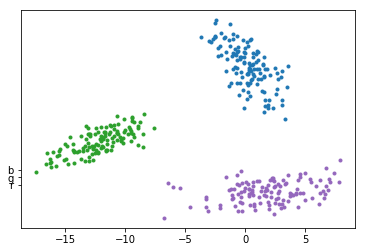

In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
# X=[1,2,3]
# Y=[1,2,3]
c={}
c[1]='r'
c[2]='g'
c[3]='b'
# X=[test_data[i][0] for i in range(0,len(test_data)) ]
# Y=[test_data[i][1] for i in range(0,len(test_data)) ]
# plt.plot(Y,X,'.')

X=[]
Y=[]
for i in range(0,4):
    vv=[]
    v=[]
    X.append(v)
    Y.append(vv)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=1
        temp=res1[i]
        if(res2[i]>temp):
            val=2
            temp=res2[i]
        if(res3[i]>temp):
            val=3
        ans.append(val)
        X[val].append(test_data[i][0])
        Y[val].append(test_data[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()
# print Y[1]
# print X[1]
plt.plot(Y[1],X[1],'.',c[1])
plt.plot(Y[2],X[2],'.',c[2])
plt.plot(Y[3],X[3],'.',c[3])
# X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
# Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
# # print Y
# plt.plot(Y,X,'.')
# X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
# Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
# plt.plot(Y,X,'.','r')
# X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
# Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
# plt.plot(Y,X,'.','g')

160000 160000
160000


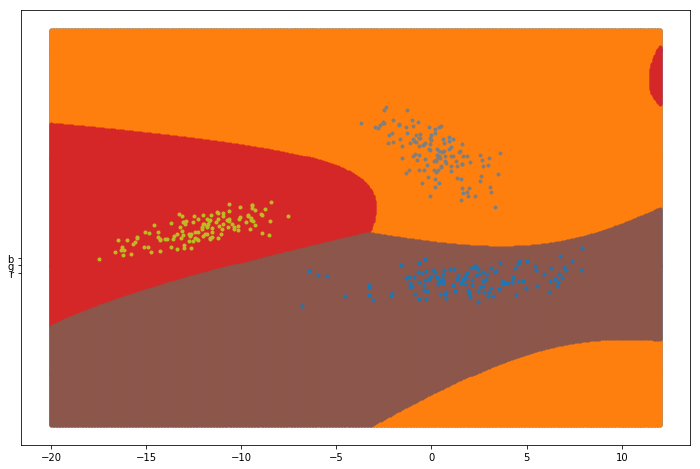

In [12]:
import numpy as np

X=np.linspace(-20,32,400)
Y=np.linspace(-20,12,400)

XX=[]
YY=[]
for i in range(0, len(X)):
    for j in range(0, len(X)):
        XX.append(X[i])

for i in range(0, len(Y)):
    for j in range(0, len(Y)):
        YY.append(Y[j])

# plt.plot(Y,X,'.')
plt.plot(YY,XX,'.')
print len(XX),len(YY)
XY=[[XX[i],YY[i]] for i in range(0,len(XX))]
print len(XY)
# print XX, YY, XY
test_data_name = XY
res1=g_c1(test_data_name)
res2=g_c2(test_data_name)
res3=g_c3(test_data_name)

c={}
c[1]='r'
c[2]='g'
c[3]='b'

x=[]
y=[]
for i in range(0,4):
    vv=[]
    v=[]
    x.append(v)
    y.append(vv)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=1
        temp=res1[i]
        if(res2[i]>temp):
            val=2
            temp=res2[i]
        if(res3[i]>temp):
            val=3
        ans.append(val)
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()
plt.plot(y[1],x[1],'.',c[1])
plt.plot(y[2],x[2],'.',c[2])
plt.plot(y[3],x[3],'.',c[3])
X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
# print Y
plt.plot(Y,X,'.')
X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
plt.plot(Y,X,'.','r')
X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
plt.plot(Y,X,'.','g')
plt.rcParams['figure.figsize'] = [10, 6]

160000 160000
160000


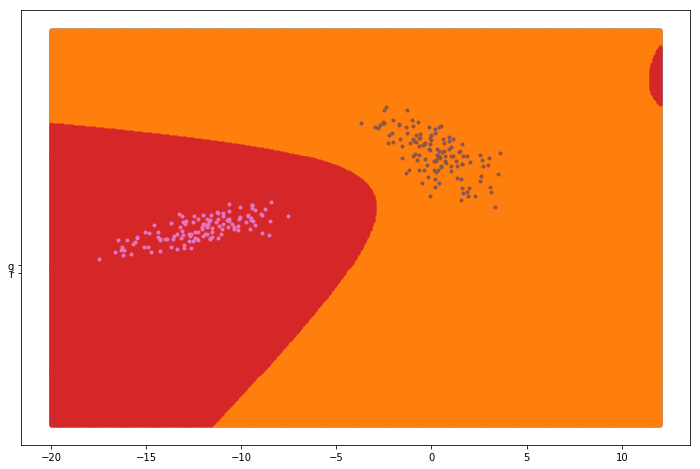

In [9]:
import numpy as np

X=np.linspace(-20,32,400)
Y=np.linspace(-20,12,400)

XX=[]
YY=[]
for i in range(0, len(X)):
    for j in range(0, len(X)):
        XX.append(X[i])

for i in range(0, len(Y)):
    for j in range(0, len(Y)):
        YY.append(Y[j])

# plt.plot(Y,X,'.')
plt.plot(YY,XX,'.')
print len(XX),len(YY)
XY=[[XX[i],YY[i]] for i in range(0,len(XX))]
print len(XY)
# print XX, YY, XY
test_data_name = XY
res1=g_c1(test_data_name)
res2=g_c2(test_data_name)
res3=g_c3(test_data_name)

c={}
c[1]='r'
c[2]='g'
c[3]='b'

x=[]
y=[]
for i in range(0,4):
    vv=[]
    v=[]
    x.append(v)
    y.append(vv)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=1
        temp=res1[i]
        if(res2[i]>temp):
            val=2
        ans.append(val)
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()
plt.plot(y[1],x[1],'.',c[1])
plt.plot(y[2],x[2],'.',c[2])
# plt.plot(y[3],x[3],'.',c[3])
X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
# print Y
plt.plot(Y,X,'.')
X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
plt.plot(Y,X,'.','r')
# X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
# Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
# plt.plot(Y,X,'.','g')
plt.rcParams['figure.figsize'] = [12, 8]

160000 160000
160000


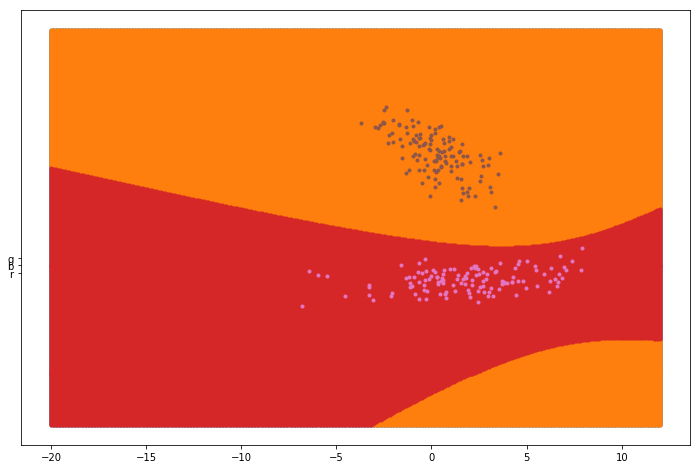

In [10]:
import numpy as np

X=np.linspace(-20,32,400)
Y=np.linspace(-20,12,400)

XX=[]
YY=[]
for i in range(0, len(X)):
    for j in range(0, len(X)):
        XX.append(X[i])

for i in range(0, len(Y)):
    for j in range(0, len(Y)):
        YY.append(Y[j])

# plt.plot(Y,X,'.')
plt.plot(YY,XX,'.')
print len(XX),len(YY)
XY=[[XX[i],YY[i]] for i in range(0,len(XX))]
print len(XY)
# print XX, YY, XY
test_data_name = XY
res1=g_c1(test_data_name)
res2=g_c2(test_data_name)
res3=g_c3(test_data_name)

c={}
c[1]='r'
c[2]='g'
c[3]='b'

x=[]
y=[]
for i in range(0,4):
    vv=[]
    v=[]
    x.append(v)
    y.append(vv)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=1
        temp=res1[i]
        if(res3[i]>temp):
            val=3
        ans.append(val)
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()
plt.plot(y[1],x[1],'.',c[1])
# plt.plot(y[2],x[2],'.',c[2])
plt.plot(y[3],x[3],'.',c[3])
X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
# print Y
plt.plot(Y,X,'.')
# X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
# Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
# plt.plot(Y,X,'.','r')
X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
plt.plot(Y,X,'.','g')
plt.rcParams['figure.figsize'] = [12, 8]

160000 160000
160000


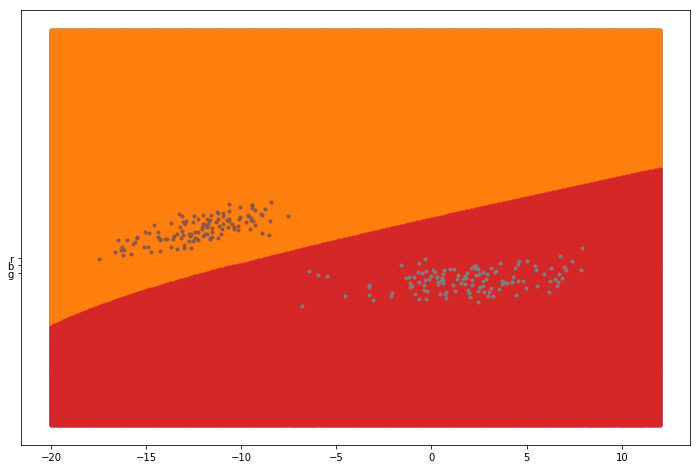

In [11]:
import numpy as np

X=np.linspace(-20,32,400)
Y=np.linspace(-20,12,400)

XX=[]
YY=[]
for i in range(0, len(X)):
    for j in range(0, len(X)):
        XX.append(X[i])

for i in range(0, len(Y)):
    for j in range(0, len(Y)):
        YY.append(Y[j])

# plt.plot(Y,X,'.')
plt.plot(YY,XX,'.')
print len(XX),len(YY)
XY=[[XX[i],YY[i]] for i in range(0,len(XX))]
print len(XY)
# print XX, YY, XY
test_data_name = XY
res1=g_c1(test_data_name)
res2=g_c2(test_data_name)
res3=g_c3(test_data_name)

c={}
c[1]='r'
c[2]='g'
c[3]='b'

x=[]
y=[]
for i in range(0,4):
    vv=[]
    v=[]
    x.append(v)
    y.append(vv)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=2
        temp=res2[i]
        if(res3[i]>temp):
            val=3
        ans.append(val)
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()
# plt.plot(y[1],x[1],'.',c[1])
plt.plot(y[2],x[2],'.',c[2])
plt.plot(y[3],x[3],'.',c[3])
# X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
# Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
# # print Y
# plt.plot(Y,X,'.')
X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
plt.plot(Y,X,'.','r')
X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
plt.plot(Y,X,'.','g')
plt.rcParams['figure.figsize'] = [12, 8]